In [43]:
from datetime import datetime, timedelta
import pandas as pd 
import numpy as np
from pandas_datareader import data
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter('ignore')
import yfinance as yf
yf.pdr_override()
import mplfinance as mpf

In [30]:
#trainデータ
start = '2016-01-03'
end = '2022-01-01'

df = data.get_data_yahoo('^N225', start, end)
df.to_csv('finance_dataset.csv')

[*********************100%***********************]  1 of 1 completed


In [44]:
#テストデータ
start = '2022-01-03'
end = '2023-01-01'

df = data.get_data_yahoo('^N225', start, end)
df.to_csv('finance_dataset.csv')

[*********************100%***********************]  1 of 1 completed


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 244 entries, 2022-01-04 to 2022-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       244 non-null    float64
 1   High       244 non-null    float64
 2   Low        244 non-null    float64
 3   Close      244 non-null    float64
 4   Adj Close  244 non-null    float64
 5   Volume     244 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.3 KB


In [46]:
#df=pd.read_csv('finance_dataset.csv')

In [47]:
df_a = pd.read_csv('finance_dataset.csv')
df_a

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-04,29098.410156,29323.789062,28954.560547,29301.789062,29301.789062,66000000
1,2022-01-05,29288.800781,29388.160156,29204.449219,29332.160156,29332.160156,78600000
2,2022-01-06,29136.750000,29158.949219,28487.869141,28487.869141,28487.869141,71600000
3,2022-01-07,28711.529297,28813.089844,28293.699219,28478.560547,28478.560547,75200000
4,2022-01-11,28380.900391,28473.470703,28089.490234,28222.480469,28222.480469,73700000
...,...,...,...,...,...,...,...
239,2022-12-26,26299.539062,26438.650391,26294.849609,26405.869141,26405.869141,47300000
240,2022-12-27,26570.779297,26620.490234,26447.869141,26447.869141,26447.869141,50200000
241,2022-12-28,26309.339844,26354.269531,26199.669922,26340.500000,26340.500000,61500000
242,2022-12-29,26074.900391,26126.699219,25953.919922,26093.669922,26093.669922,63100000


In [48]:
df_a['Date'] = pd.to_datetime(df_a['Date'])
df_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       244 non-null    datetime64[ns]
 1   Open       244 non-null    float64       
 2   High       244 non-null    float64       
 3   Low        244 non-null    float64       
 4   Close      244 non-null    float64       
 5   Adj Close  244 non-null    float64       
 6   Volume     244 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 13.5 KB


In [49]:
df_b = pd.read_csv('finance_dataset.csv')
df_b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       244 non-null    object 
 1   Open       244 non-null    float64
 2   High       244 non-null    float64
 3   Low        244 non-null    float64
 4   Close      244 non-null    float64
 5   Adj Close  244 non-null    float64
 6   Volume     244 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.5+ KB


In [50]:
b = df_b['Date']

In [51]:
df_shift = df.shift(-1)
df['delta_Close'] = df_shift['Close'] - df_shift['Open']
df

,Open,High,Low,Close,Adj Close,Volume,delta_Close
Date,,,,,,,
2022-01-04,29098.410156,29323.789062,28954.560547,29301.789062,29301.789062,66000000,43.359375
2022-01-05,29288.800781,29388.160156,29204.449219,29332.160156,29332.160156,78600000,-648.880859
2022-01-06,29136.750000,29158.949219,28487.869141,28487.869141,28487.869141,71600000,-232.968750
2022-01-07,28711.529297,28813.089844,28293.699219,28478.560547,28478.560547,75200000,-158.419922
2022-01-11,28380.900391,28473.470703,28089.490234,28222.480469,28222.480469,73700000,316.130859
...,...,...,...,...,...,...,...
2022-12-26,26299.539062,26438.650391,26294.849609,26405.869141,26405.869141,47300000,-122.910156
2022-12-27,26570.779297,26620.490234,26447.869141,26447.869141,26447.869141,50200000,31.160156
2022-12-28,26309.339844,26354.269531,26199.669922,26340.500000,26340.500000,61500000,18.769531


In [52]:
df['UP'] = 0
df['UP'] [df['delta_Close'] > 0] = 1
df = df.drop('delta_Close', axis=1)
df

,Open,High,Low,Close,Adj Close,Volume,UP
Date,,,,,,,
2022-01-04,29098.410156,29323.789062,28954.560547,29301.789062,29301.789062,66000000,1
2022-01-05,29288.800781,29388.160156,29204.449219,29332.160156,29332.160156,78600000,0
2022-01-06,29136.750000,29158.949219,28487.869141,28487.869141,28487.869141,71600000,0
2022-01-07,28711.529297,28813.089844,28293.699219,28478.560547,28478.560547,75200000,0
2022-01-11,28380.900391,28473.470703,28089.490234,28222.480469,28222.480469,73700000,1
...,...,...,...,...,...,...,...
2022-12-26,26299.539062,26438.650391,26294.849609,26405.869141,26405.869141,47300000,0
2022-12-27,26570.779297,26620.490234,26447.869141,26447.869141,26447.869141,50200000,1
2022-12-28,26309.339844,26354.269531,26199.669922,26340.500000,26340.500000,61500000,1


In [53]:
df['UP'][5]

0

In [54]:
b

0      2022-01-04
1      2022-01-05
2      2022-01-06
3      2022-01-07
4      2022-01-11
          ...    
239    2022-12-26
240    2022-12-27
241    2022-12-28
242    2022-12-29
243    2022-12-30
Name: Date, Length: 244, dtype: object

In [55]:
len(b)-5

239

In [42]:
#トレーニングデータの作成
for i in range(len(b)-21):
    if df['UP'][i+21] == 0:
        mpf.plot(df[i:i+21], type='candle', datetime_format='%Y/%m/%d', axisoff=True, savefig= fr'train_7\5days\{b[i]}.jpg')
    else:
        mpf.plot(df[i:i+21], type='candle', datetime_format='%Y/%m/%d', axisoff=True, savefig= fr'train_7\5days\{b[i]}.jpg')

In [56]:
#テストデータの作成
for i in range(len(b)-21):
    if df['UP'][i+21] == 0:
        mpf.plot(df[i:i+21], type='candle', datetime_format='%Y/%m/%d', axisoff=True, savefig= fr'test_7\5days\{b[i]}.jpg')
    else:
        mpf.plot(df[i:i+21], type='candle', datetime_format='%Y/%m/%d', axisoff=True, savefig= fr'test_7\5days\{b[i]}.jpg')

In [36]:
for i in range(len(b)-5):
    if df['UP'][i] == 0:
        mpf.plot(df[i:i+1], type='candle', savefig= fr'train_2\5days\{b[i]}.jpg')
    else:
        mpf.plot(df[i:i+1], type='candle', savefig= fr'train_2\5days\{b[i]}.jpg')

In [14]:
for i in range(5):
    start = a[i]
    end = a[i+5]

df = data.get_data_yahoo('^N225', start, end)
df.to_csv('finance_dataset.csv')
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-11,19358.640625,19402.169922,19325.460938,19364.669922,19364.669922,119100000
2017-01-12,19300.189453,19300.189453,19069.019531,19134.699219,19134.699219,119100000
2017-01-13,19174.970703,19299.359375,19156.929688,19287.279297,19287.279297,119100000
2017-01-16,19219.130859,19255.410156,19061.269531,19095.240234,19095.240234,119100000
2017-01-17,19038.449219,19043.910156,18812.859375,18813.529297,18813.529297,119100000


In [16]:
i = 0
j = 5
df[i:i+5]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-11,19358.640625,19402.169922,19325.460938,19364.669922,19364.669922,119100000
2017-01-12,19300.189453,19300.189453,19069.019531,19134.699219,19134.699219,119100000
2017-01-13,19174.970703,19299.359375,19156.929688,19287.279297,19287.279297,119100000
2017-01-16,19219.130859,19255.410156,19061.269531,19095.240234,19095.240234,119100000
2017-01-17,19038.449219,19043.910156,18812.859375,18813.529297,18813.529297,119100000


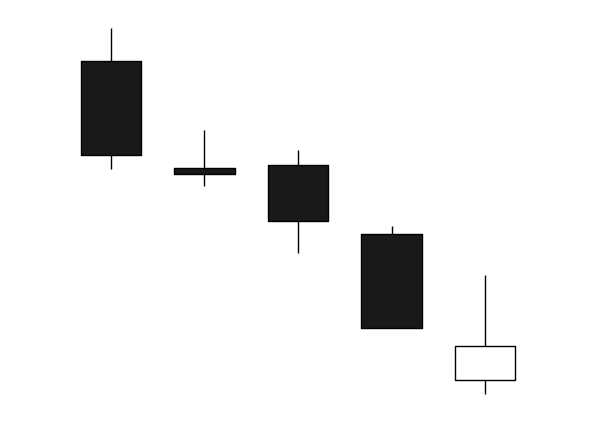

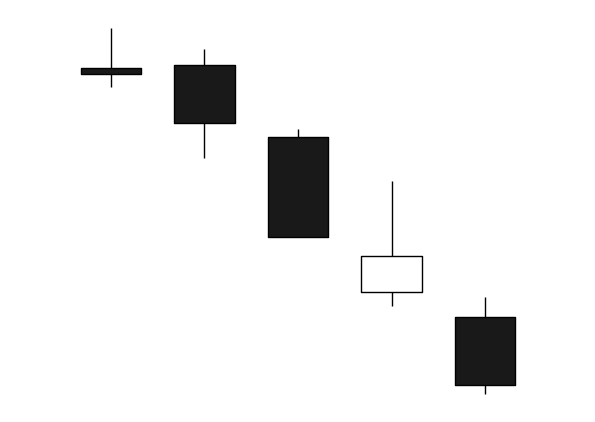

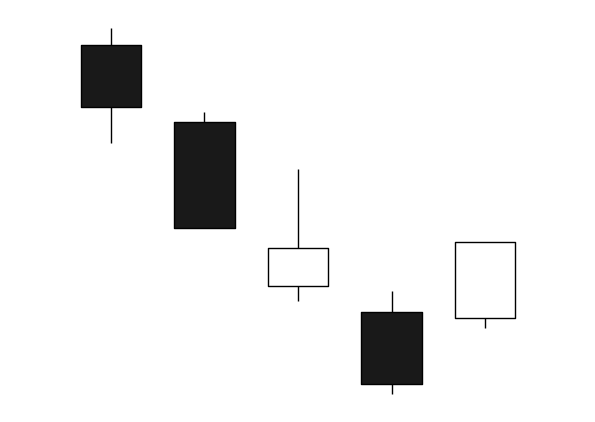

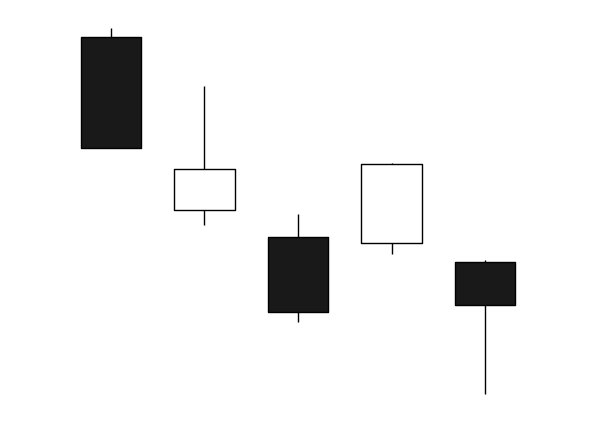

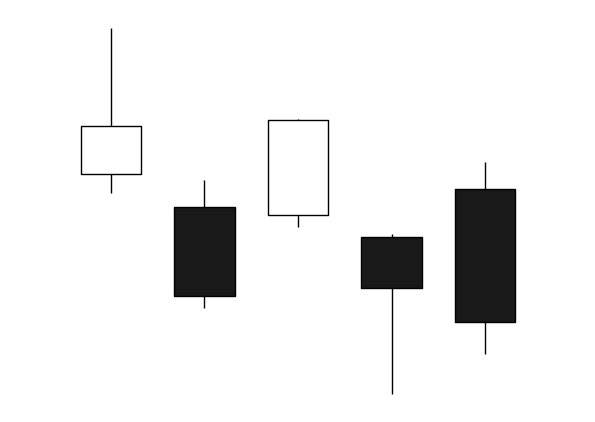

In [23]:
for i in range(5):
    mpf.plot(df[i:i+5], type='candle', datetime_format='%Y/%m/%d', axisoff=True)

In [73]:
df=pd.read_csv('finance_dataset.csv')
df['Date']=pd.to_datetime(df['Date'])
a = df['Date']
for i in range(len(a)-5):
    print(a[i])
    df = df.drop(df.index[[0]])
    a = df['Date']
    print(a)
df

SyntaxError: invalid syntax (3392554217.py, line 8)

In [68]:
df = df.drop(df.index[[0]])
df

,Date,Open,High,Low,Close,Adj Close,Volume
7,2017-01-16,19219.130859,19255.410156,19061.269531,19095.240234,19095.240234,119100000
8,2017-01-17,19038.449219,19043.910156,18812.859375,18813.529297,18813.529297,119100000
9,2017-01-18,18753.960938,18941.240234,18650.330078,18894.369141,18894.369141,119100000
10,2017-01-19,19082.830078,19122.390625,18982.130859,19072.250000,19072.250000,170600000


In [1]:

mpf.plot(df[0:5], type='candle')

NameError: name 'mpf' is not defined

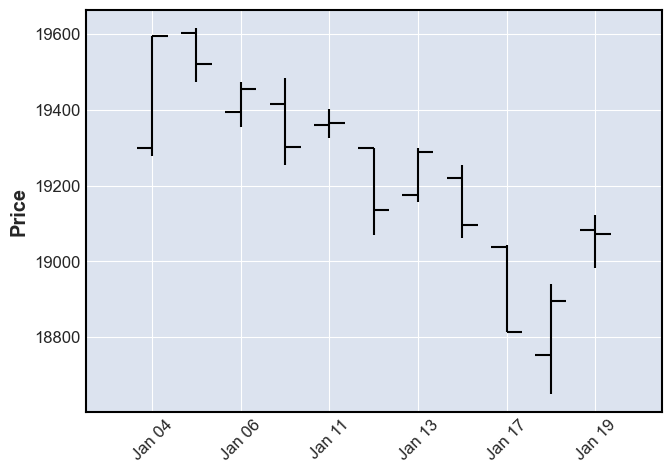

In [9]:
mpf.plot(df)

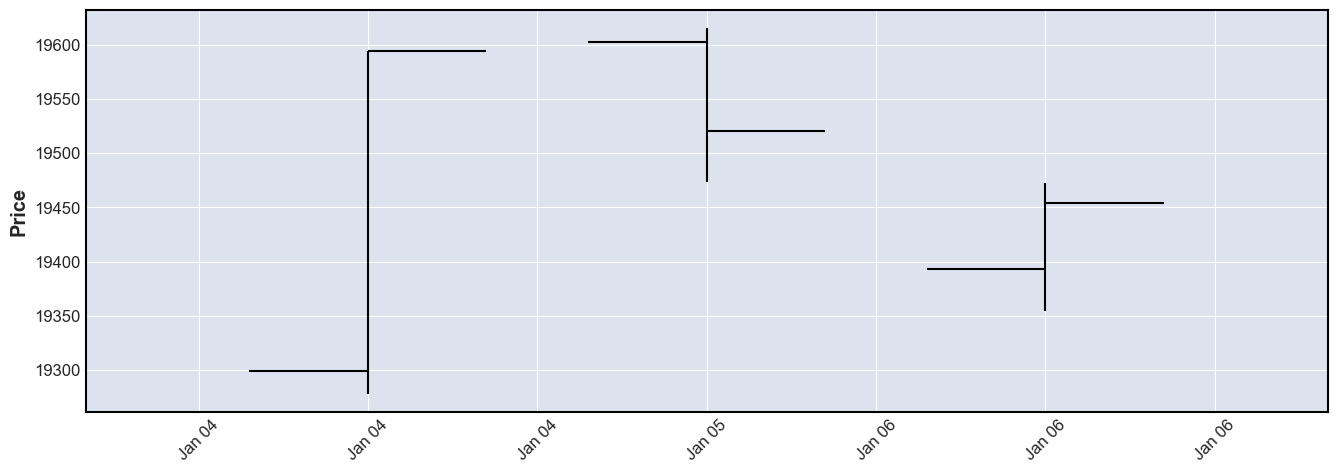

In [10]:
mpf.plot(df[0:3], figratio=(12,4),)

FileNotFoundError: [Errno 2] No such file or directory: 'data/dst/candlestick_mpf_candle.png'

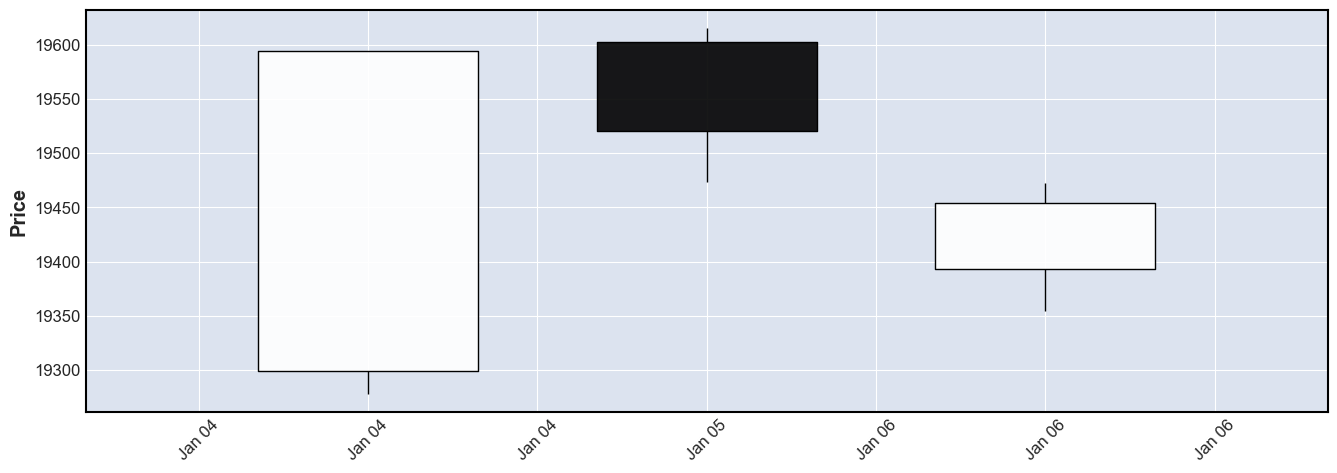

In [11]:
mpf.plot(df[0:3], type='candle', figratio=(12,4),
         savefig='data/dst/candlestick_mpf_candle.png')

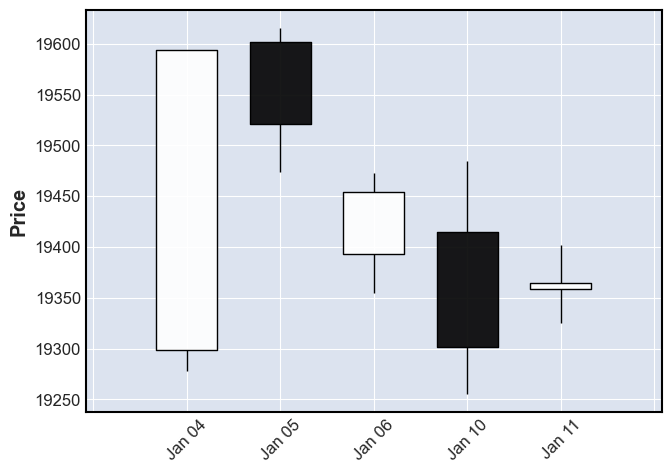

In [12]:
mpf.plot(df[0:5], type='candle')

FileNotFoundError: [Errno 2] No such file or directory: 'data/dst/candlestick_mpf_style_yahoo.png'

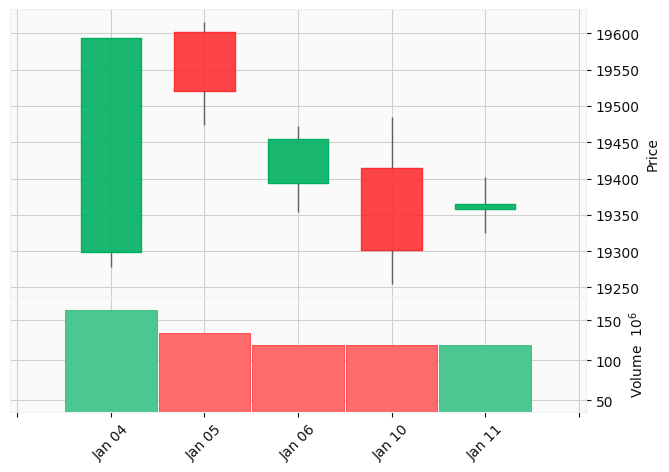

In [35]:
mpf.plot(df[0:5], type='candle', 
         volume=True, mav=(5, 25), style='yahoo',
         savefig='data/dst/candlestick_mpf_style_yahoo.png')